In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [6]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [11]:
df=pd.read_csv(filepath_or_buffer='C:\Data_jupyter\iris.data.csv',header=None,sep=',')
df.columns=['Sepal length','Sepal width','Petal Length','Petal Width','Species']
data=df.iloc[:,0:4].values
target=df.iloc[:,4].values
df[:5]


,Sepal length,Sepal width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
model=DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=19, n_jobs=1, p=None)


In [15]:
#visualize your result
outliers_df=pd.DataFrame(data)
print(Counter(model.labels_))
print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


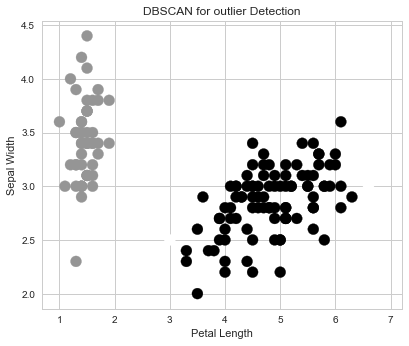

In [18]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])

colors=model.labels_

ax.scatter(data[:,2],data[:,1],c=colors,s=120)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title("DBSCAN for outlier Detection")